In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy
import pandas as pd
import os
print(tf.__version__)

2.5.0-dev20200629


In [2]:
print(tf.__version__)

2.5.0-dev20200629


In [10]:
mainpath = "C:/Users/hecag/Desktop/Ingeniería Civil Industrial UdeC/6° Año/Machine Learning/Certamen1/Certamen1"
filename = "/train_split_v3.txt"
fullpath = mainpath + filename

In [11]:
data = pd.read_csv(fullpath, delim_whitespace=True, header=0, names=['Number','Location','Condition','Place'])
data = data.drop(["Number","Place"], axis = 1)
print(data.shape)

data=data.replace({"Condition":"normal"},0)
data=data.replace({"Condition":"pneumonia"},1)
data=data.replace({"Condition":"COVID-19"},2)


#dummy_condition = pd.get_dummies(data["Condition"], prefix="Condition")
#data = pd.concat([data, dummy_condition], axis = 1)
#data = data.drop(["Condition"], axis = 1)

(13897, 2)


In [12]:
from __future__ import division   # impone aritmética no entera en la división
from PIL import Image             # funciones para cargar y manipular imágenes
import numpy as np                # funciones numéricas (arrays, matrices, etc.)
import matplotlib.pyplot as plt   # funciones para representación gráfica
import cv2
import random

In [13]:
 %matplotlib inline

In [15]:
path_train = "C:/Users/hecag/Desktop/Ingeniería Civil Industrial UdeC/6° Año/Machine Learning/Certamen1/Certamen1/data/train/"

In [17]:
#imagen fav = 500

X_train = []
Y_train = []


for i in range(0,100):


    image = Image.open(path_train + data["Location"][i])
    image = np.asarray(image,dtype=np.float64)/255.0
    
    condition_image=data["Condition"][i]   
    #print("- Estado del paciente:")
    #print(condition_image)


    #print("Imagen sin edición")
    #plt.imshow(image)
    #plt.show()
    #print("- Dimensiones de entrada de la imagen:")
    #print(image.shape)
    
    tall=image.shape[0] #Alto imagen
    cut=int(tall*0.15) #Cortando el 15%
    image = image[cut:image.shape[0],0:image.shape[1]] #imagen sin el 15% superior

    if image.shape[1]>image.shape[0]:
        dif=image.shape[1]-image.shape[0]
        image = image[0:image.shape[0],0+int(dif/2):image.shape[1]-int(dif/2)-1] #Cortando de forma simétrica los laterales
    
    if image.shape[1]<image.shape[0]:
        dif=image.shape[0]-image.shape[1]
        image = image[0:image.shape[0],0+int(dif/2):image.shape[1]-int(dif/2)-1] #Cortando de forma simétrica los laterales
    
    
    image = cv2.resize(image, dsize=(256, 256), interpolation=cv2.INTER_CUBIC) #Redimensionando imagen
    
    
    if len(image.shape)>2: 
        image=image[:,:,0] 
        

    ##REALIZAMOS SIMETRIA AXIAL EJE HORIZONTAL CON PROBIABILIDAD 0.5
    rand = random.random()
    #print(rand)
    if rand>0.5:    
        image = cv2.flip(image, 1)
 

    ##REALIZAMOS CORTES RANDOM A LA IMAGEN PARA DEJARLAS DE 224x224
    if rand<0.25:   
        image = image[32:image.shape[0],32:image.shape[1]] #corte laterial izquierdo y superior
    if 0.25<=rand<0.5:
        image = image[0:image.shape[0]-32,0:image.shape[1]-32] #corte latereal derecho y inferior
    if 0.5<=rand<0.75:
        image = image[32:image.shape[0],0:image.shape[1]-32] #corte lateral izquierdo e inferior
    if 0.75<=rand:
        image = image[0:image.shape[0]-32,32:image.shape[1]] #corte lateral derecho y superior
    
    #print(image.shape)
    
    X_train.append(image)
    Y_train.append(data["Condition"][i])
    
    #plt.imshow(image)
    #plt.show()
    #print(i)
    #print("- Nuevas dimensiones de la imagen:")
    #print(image.shape)
    #(13876,256,256)
    
    if i%20==0:
        print(i)
        print(np.array(X_train).shape)
    
    i=i+1

0
(1, 224, 224)
20
(21, 224, 224)
40
(41, 224, 224)
60
(61, 224, 224)
80
(81, 224, 224)


In [23]:
X_train = np.array(X_train)
print(X_train.shape)
Y_train= np.array(Y_train)
print(Y_train.shape)

(100, 224, 224)
(100,)


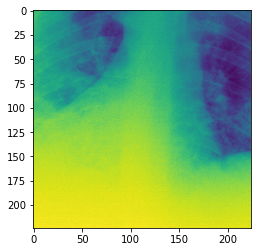

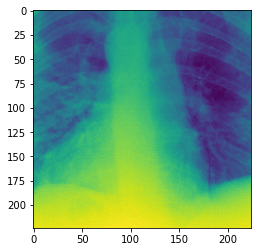

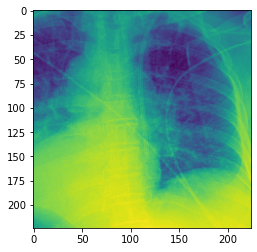

In [21]:
plt.imshow(X_train[4])
plt.show()
plt.imshow(X_train[5])
plt.show()
plt.imshow(X_train[20])
plt.show()